In [2]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer, execute
from qiskit.visualization import plot_histogram

In [3]:
svbackend = BasicAer.get_backend('statevector_simulator')
qmbackend = BasicAer.get_backend('qasm_simulator')

# Counting

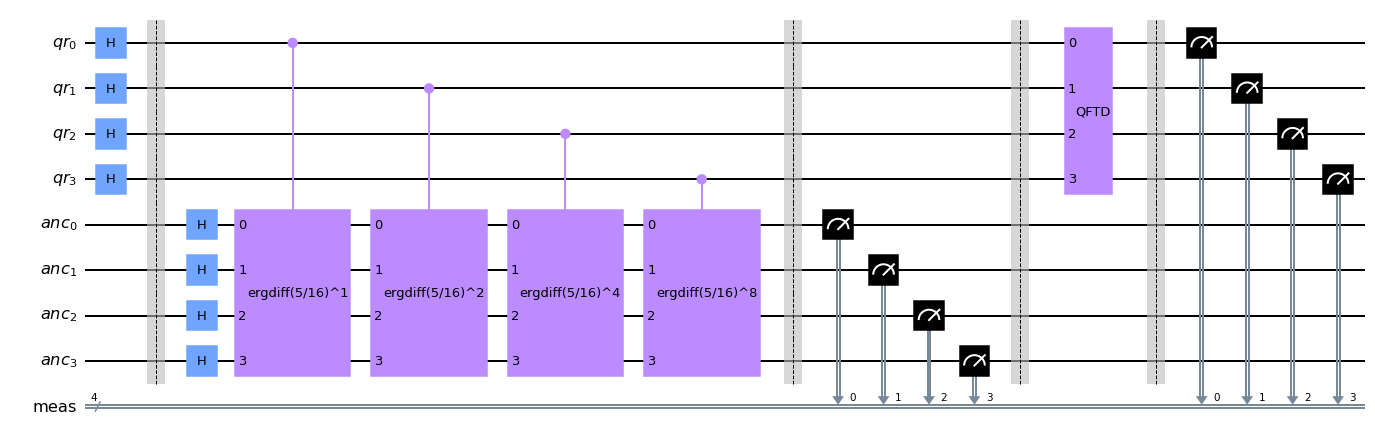

In [252]:
t = 16/5
nqr = 4
nanc = 4
Q = 2**nqr

qr = QuantumRegister(nqr, 'qr')
anc = QuantumRegister(nanc, 'anc')
meas = ClassicalRegister(nqr, 'meas')
counting = QuantumCircuit(qr, anc, meas)
counting.h(qr)
counting.barrier()

##################################################################################################################

def grdiff():
    qc = QuantumCircuit(4)
    qc.h([2,3])
    qc.ccx(0,1,2)
    qc.h(2)
    qc.x(2)
    qc.ccx(0,2,3)
    qc.x(2)
    qc.h(3)
    qc.x([1,3])
    qc.h(2)
    qc.mct([0,1,3],2)
    qc.x([1,3])
    qc.h(2)
    qc.h(range(3))
    qc.x(range(3))
    qc.z(3)
    qc.mct([0,1,2],3)
    qc.x(range(3))
    qc.h(range(3))
    qc.z(3)
    qc = qc.to_gate()
    qc.name = "gr+diff"
    return qc

def egrdiff(exp):
    qc = QuantumCircuit(4)
    for i in range(exp):
        qc.append(grdiff(),list(range(4)))
    return qc

def c_egrdiff(exp):
    qc = egrdiff(exp).to_gate()
    qc.name = "ergdiff(5/16)^%i" % (exp)
    c_qc = qc.control()
    return c_qc

counting.h(anc)
for nq in range(nqr):
    counting.append(c_egrdiff(2**nq), [qr[nq]]+[qanc for qanc in anc])

##################################################################################################################

counting.barrier()
counting.measure(anc,meas[:nanc])
counting.barrier()

##################################################################################################################

def qdft(n):
    qc = QuantumCircuit(n)
    for q in range(n//2):
        qc.swap(q, n-q-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    return qc

def qdftd(n):
    qc = qdft(n).inverse().to_gate()
    qc.name = "QFTD" 
    return qc

counting.append(qdftd(nqr), qr)

##################################################################################################################

counting.barrier()
counting.measure(qr,meas)
counting.draw(output='mpl', fold=-1)

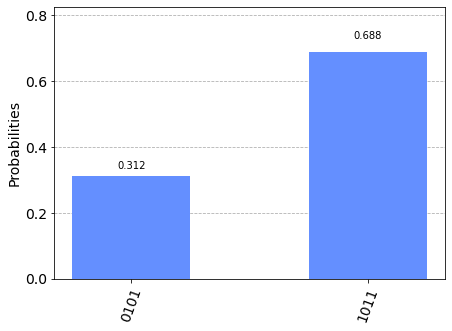

In [253]:
job = execute(counting, qmbackend, shots=Q)
result = job.result()
result.get_counts()
plot_histogram(result.get_counts())

In [260]:
print("Possible peak deltas [Cheating]:")
i = 0
deltas = []
while (Q/t)*i < Q:
    deltas.append((Q/thet)*i)
    i+=1
print(deltas)

print("\nExpected peak deltas [Cheating]:")
values = [(Q/t), (Q/t)*(t-1)]
print(values)

print("\nObserved peak deltas")
values = [int(output,2) for output in result.get_counts()]
print(values)

print("\nMaximum one")
values = max(values)
print(values)

print("\nMinused one")
values = 1-values/Q
print(values)

print("\nError percentages")
percent = abs(values-1/t)*100
print(percent)

print("\nResult:")
if percent < 5:
    print("Success")
else:
    print("Failure")
print(values)
print(values*Q)

Possible peak deltas [Cheating]:
[0.0, 5.0, 10.0, 15.0]

Expected peak deltas [Cheating]:
[5.0, 11.0]

Observed peak deltas
[11, 5]

Maximum one
11

Minused one
0.3125

Error percentages
0.0

Result:
Success
0.3125
5.0
